In [23]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating average/count by day

In [49]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day'])['Rating'].mean()
day_average.head()

Day
2018-01-01    4.532609
2018-01-02    4.122807
2018-01-03    4.360465
2018-01-04    4.531250
2018-01-05    4.423077
Name: Rating, dtype: float64

In [48]:
day_count = data.groupby(['Day']).count()
day_count.head()

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


np.float64(3.7916666666666665)

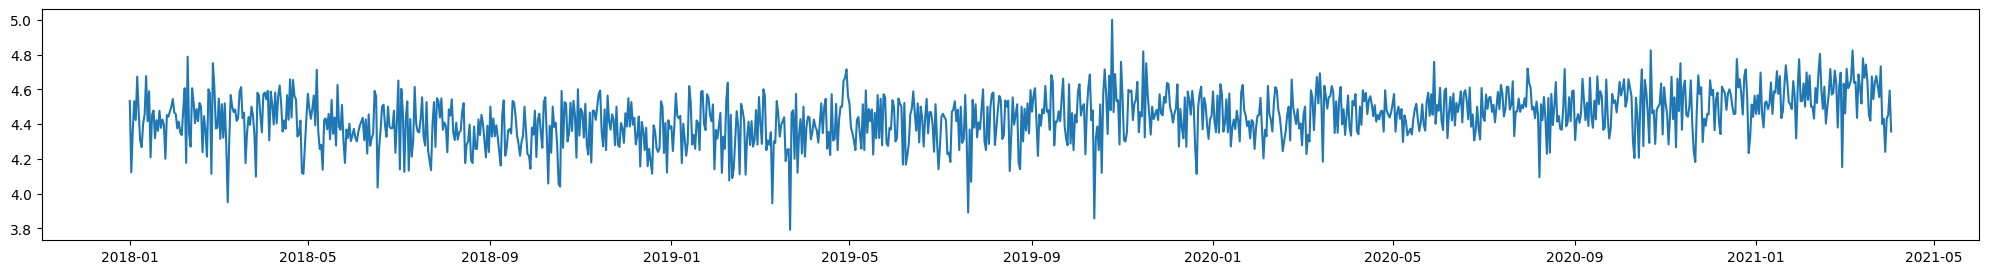

In [43]:
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average)
day_average.min()

### Rating average by week

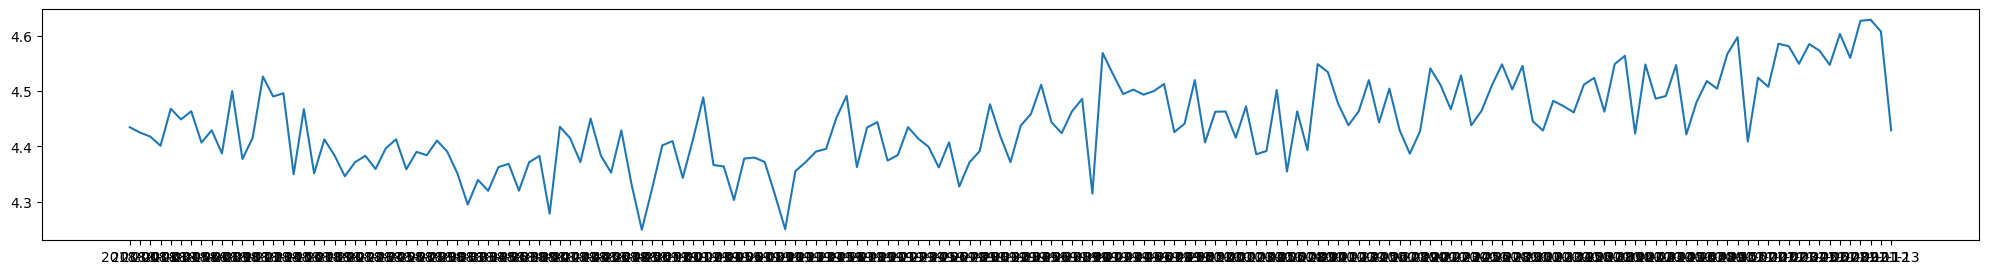

In [59]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week'])['Rating'].mean()
week_average

plt.figure(figsize=(25, 3))
plt.plot(week_average.index, week_average)

### Average rating by month

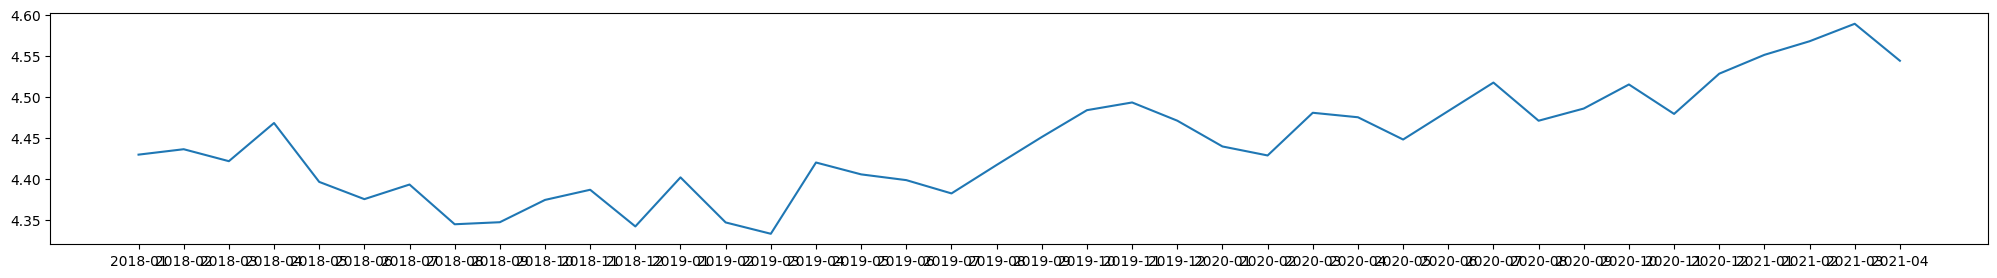

In [60]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month'])['Rating'].mean()
month_average

plt.figure(figsize=(25, 3))
plt.plot(month_average.index, month_average)

### Average rating by month by course

<Axes: xlabel='Month'>

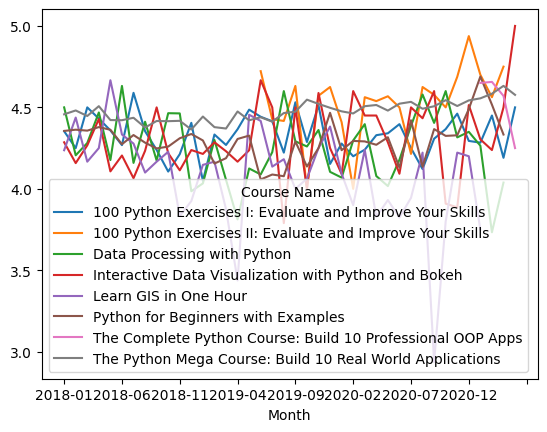

In [66]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month','Course Name'])['Rating'].mean().unstack()

month_average_crs.plot(figsize=(25, 3)